In [1]:
from itertools import combinations
import pandas as pd
import numpy as np
import networkx as nx
import pickle as pk
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/cleaned_data_SYMPTOMS_9_7_23.csv', index_col=0)
df = df.fillna(value=0)

#### First we make a symtpom co-occurrence network:

In [3]:
df

,Symptom_Memory_short,Symptom_Memory_long,Symptom_Memory_no_new_memories,Symptom_Memory_forget_tasks,Symptom_Memory_other,Symptom_Cognitive_Functioning_thinking,Symptom_Cognitive_Functioning_executive,Symptom_Cognitive_Functioning_problemsolving,Symptom_Cognitive_Functioning_slowedthoughts,Symptom_Cognitive_Functioning_fastthoughts,...,Symptom_SkinAllergy_itchy_skin,Symptom_SkinAllergy_itchy_eyes,Symptom_SkinAllergy_heighted_reaction_allergies,Symptom_SkinAllergy_brittle_nail,Symptom_SkinAllergy_new_allergies,Symptom_SkinAllergy_other_itchy,Symptom_SkinAllergy_shingles,Symptom_PEM,Symptom_Fatigue,Symptom_Change_sensitivity_to_meds
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,1,0,0,1,1,0
5,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0,0,0,1,0,0,0,1,1,0
6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,1,1,0
8,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,1,1,0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14158,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1,1,0,1,0,0,0,1,1,1
14161,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1,0,0,0,0,0,0,1,1,0
14163,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,1
14166,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
def pairwise_weight(v1, v2):
    return (v1 * v2).sum()

In [5]:
def build_graph(df, weight_metric=pairwise_weight, threshold=0.0, save_path=None):
    """
    Method builds graph from a dataframe df where each
    column is to be a node, and the edge weight is computed between each
    pair of column vectors using the weight_metric.
        
        Parameters:
            df: pd.DataFrame
                Data to build graph from - columns are nodes.
            weight_metric: function
                Function that accepts two vectors as args and returns
                a real-valued weight, where a higher number means the
                two vectors are 'closer' in some sense.
            threshold: float
                Only include edges above this threshold weight.
                Can improve algorithm performance e.g. for community detection.
                
        Returns:
            G: nx.Graph
                Undirected weighted graph.
    """
    start_time = time.time()
    G = nx.Graph()
    for col in df.columns:
        G.add_node(col)

    pairs = list(combinations(df.columns, 2))
    for pi, pair in enumerate(pairs):

        if pi % 100000 == 0:
            print("Pair %d of %d." % (pi, len(pairs)))
            print("Elapsed time: %.2f" % ((time.time() - start_time)/ 60))
            
        _weight = pairwise_weight(df[pair[0]], df[pair[1]])
        if _weight > threshold:
            G.add_edge(
                u_of_edge=pair[0], v_of_edge=pair[1],
                weight=_weight    
            )

    if save_path is not None:
        nx.write_adjlist(G, path=save_path)

    return G
            

In [6]:
dft = df.transpose()

In [7]:
dft

,3,5,6,8,9,10,11,12,13,14,...,14141,14143,14144,14150,14155,14158,14161,14163,14166,14168
Symptom_Memory_short,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Symptom_Memory_long,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
Symptom_Memory_no_new_memories,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Symptom_Memory_forget_tasks,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
Symptom_Memory_other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Symptom_SkinAllergy_other_itchy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Symptom_SkinAllergy_shingles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Symptom_PEM,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
Symptom_Fatigue,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [29]:
G = nx.read_adjlist('./graphs/full_patient_graph_shared_symptom_count.adjlist', nodetype=int)
# G = build_graph(dft)

In [13]:
# nx.write_adjlist(G, path='graphs/full_patient_graph_shared_symptom_count.adjlist')

In [14]:
# len(G.edges.data())

18201304

In [16]:
all_weights = [
    edge[2]['weight']
    for edge in G.edges.data()
]

(array([8.097045e+06, 7.179935e+06, 2.319680e+06, 4.817410e+05,
        1.017150e+05, 1.861700e+04, 2.271000e+03, 2.630000e+02,
        3.600000e+01, 1.000000e+00]),
 array([  1. ,  15.4,  29.8,  44.2,  58.6,  73. ,  87.4, 101.8, 116.2,
        130.6, 145. ]),
 <BarContainer object of 10 artists>)

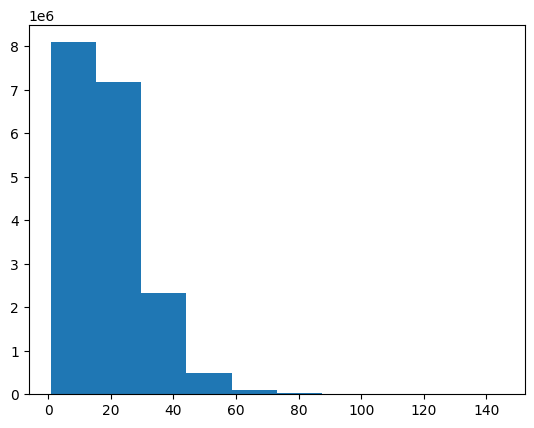

In [17]:
plt.hist(all_weights)

In [18]:
print(np.min(all_weights))
print(np.mean(all_weights))
print(np.median(all_weights))
print(np.max(all_weights))

1.0
19.066403923587014
17.0
145.0


In [19]:
all_weights = np.array(all_weights)

In [20]:
(all_weights == 1).sum()

88708

In [21]:
(all_weights == 2).sum()

162949

In [23]:
print(100 * (all_weights == 1).sum() / len(all_weights))
print(100 * (all_weights == 2).sum() / len(all_weights))
print(100 * (all_weights == 3).sum() / len(all_weights))
print(100 * (all_weights == 4).sum() / len(all_weights))
print(100 * (all_weights == 5).sum() / len(all_weights))

0.4873716740295091
0.8952600319185922
1.3288718214914712
1.770768731734825
2.2121876542471903


In [34]:
communities = nx.community.louvain_communities(G, resolution=1, seed=42)

In [35]:
with open('./graphs/full_patient_graph_louvain_communities_gamma_1.pickle', 'wb') as outfile:
    pk.dump(communities, outfile)

# with open('./graphs/full_patient_graph_louvain_communities_gamma_1.pickle', 'rb') as infile:
#     communities = pk.load(infile)

In [36]:
len(communities)

2

In [37]:
len(list(nx.connected_components(G)))

1

In [32]:
# nx.average_clustering(G, weight='weight')

In [38]:
for ci, c in enumerate(communities):
    print("Size of community %d: %d" % (ci, len(c)))

Size of community 0: 3004
Size of community 1: 3031


In [39]:
community_data = {
    ci: df.loc[list(c)].sum() / len(c)
    for ci, c in enumerate(communities)
}   

In [40]:
community_data[0].sort_values(ascending=False).head(20)

Symptom_Memory_short                                    1.000000
Symptom_Fatigue                                         0.962051
Symptom_PEM                                             0.852197
Symptom_Cognitive_Functioning_attentionconcentration    0.734687
Symptom_Shortness_of_breath                             0.719374
Symptom_Insomnia                                        0.686085
Symptom_Muscle_aches                                    0.674767
Symptom_Tightness_of_chest                              0.674434
Symptom_Dizziness_vertigo                               0.659454
Symptom_Heart_palpitations                              0.652130
Symptom_Cognitive_Functioning_thinking                  0.642144
Symptom_Dry_cough                                       0.628828
Symptom_Tachycardia                                     0.583888
Symptom_Cognitive_Functioning_executive                 0.581891
Symptom_Gasping_air_normal_oxygen                       0.548935
Symptom_Elevated_temp    

In [41]:
community_data[1].sort_values(ascending=False).head(20)

Symptom_Fatigue                                         0.996701
Symptom_PEM                                             0.914880
Symptom_Memory_short                                    0.849225
Symptom_Cognitive_Functioning_attentionconcentration    0.771033
Symptom_Shortness_of_breath                             0.754207
Symptom_Insomnia                                        0.700099
Symptom_Cognitive_Functioning_thinking                  0.689871
Symptom_Tightness_of_chest                              0.685912
Symptom_Dizziness_vertigo                               0.685252
Symptom_Muscle_aches                                    0.679644
Symptom_Heart_palpitations                              0.660508
Symptom_Dry_cough                                       0.643352
Symptom_Tachycardia                                     0.600132
Symptom_Cognitive_Functioning_executive                 0.595183
Symptom_Gasping_air_normal_oxygen                       0.582976
Symptom_Cognitive_Functio

In [42]:
community_data[2].sort_values(ascending=False).head(20)

KeyError: 2

### Lets try training an RF to see which features are informative in predicting cluster ID:

In [43]:
train = df

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
def get_community(i, parition):
    for pi, part in enumerate(parition):
        if i in part:
            return pi

    return -1

In [46]:
y = [
    get_community(r[0], communities)
    for r in  df.iterrows()
]

In [47]:
clf = RandomForestClassifier()

In [48]:
clf.fit(df, y)

RandomForestClassifier()

In [49]:
clf.score(df, y)

1.0

In [50]:
fimp = pd.DataFrame(clf.feature_importances_, columns=['importance'], index=df.columns).sort_values(by='importance', ascending=False)

In [51]:
fimp

,importance
Symptom_Memory_short,0.041986
Symptom_PEM,0.010152
Symptom_Sleep_other,0.008731
Symptom_Loss_of_smell,0.008621
Symptom_Cognitive_Functioning_slowedthoughts,0.008510
...,...
Symptom_Hallucinations_tactile,0.001647
Symptom_Hallucinations_other,0.001383
Symptom_Reproductive_postmenopausal_bleeding,0.001155
Symptom_Reproductive_early_menopause,0.000906


In [53]:
import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [54]:
explainer = shap.Explainer(clf.predict, df)

In [55]:
shap_values = explainer(df)

Permutation explainer: 6036it [16:22,  6.10it/s]                                                                                                                                                                                                                                                                         


In [68]:
shap_values[[1,2,5], :].shape

(3, 165)

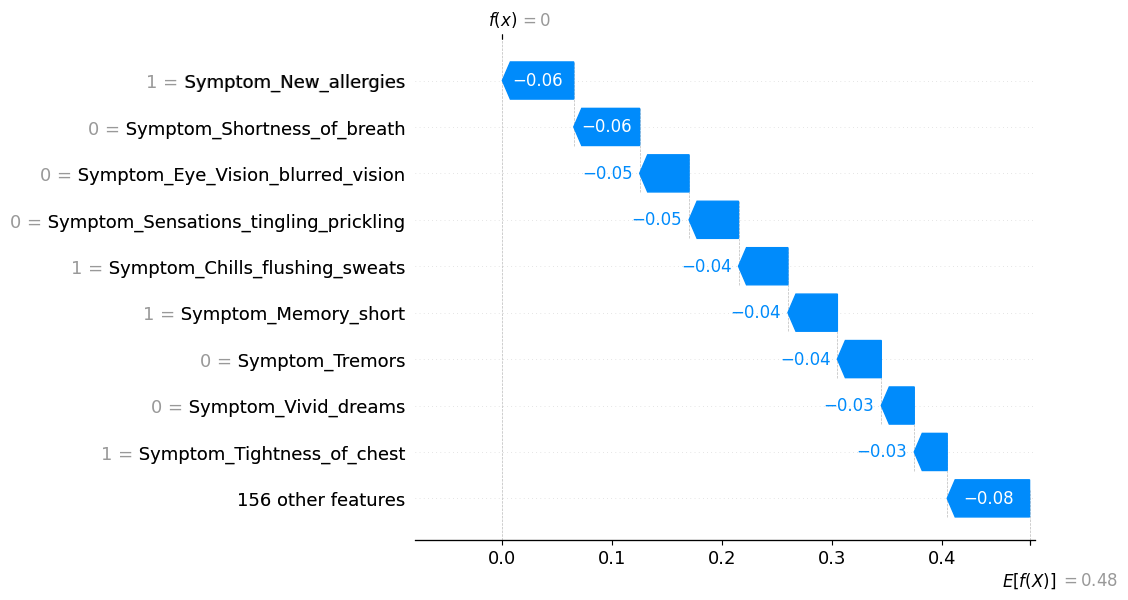

In [72]:
shap.plots.waterfall(shap_values[0, :])

In [73]:
df

,Symptom_Memory_short,Symptom_Memory_long,Symptom_Memory_no_new_memories,Symptom_Memory_forget_tasks,Symptom_Memory_other,Symptom_Cognitive_Functioning_thinking,Symptom_Cognitive_Functioning_executive,Symptom_Cognitive_Functioning_problemsolving,Symptom_Cognitive_Functioning_slowedthoughts,Symptom_Cognitive_Functioning_fastthoughts,...,Symptom_SkinAllergy_itchy_skin,Symptom_SkinAllergy_itchy_eyes,Symptom_SkinAllergy_heighted_reaction_allergies,Symptom_SkinAllergy_brittle_nail,Symptom_SkinAllergy_new_allergies,Symptom_SkinAllergy_other_itchy,Symptom_SkinAllergy_shingles,Symptom_PEM,Symptom_Fatigue,Symptom_Change_sensitivity_to_meds
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,1,0,0,1,1,0
5,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0,0,0,1,0,0,0,1,1,0
6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,1,1,0
8,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,1,1,0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14158,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1,1,0,1,0,0,0,1,1,1
14161,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1,0,0,0,0,0,0,1,1,0
14163,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,1
14166,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


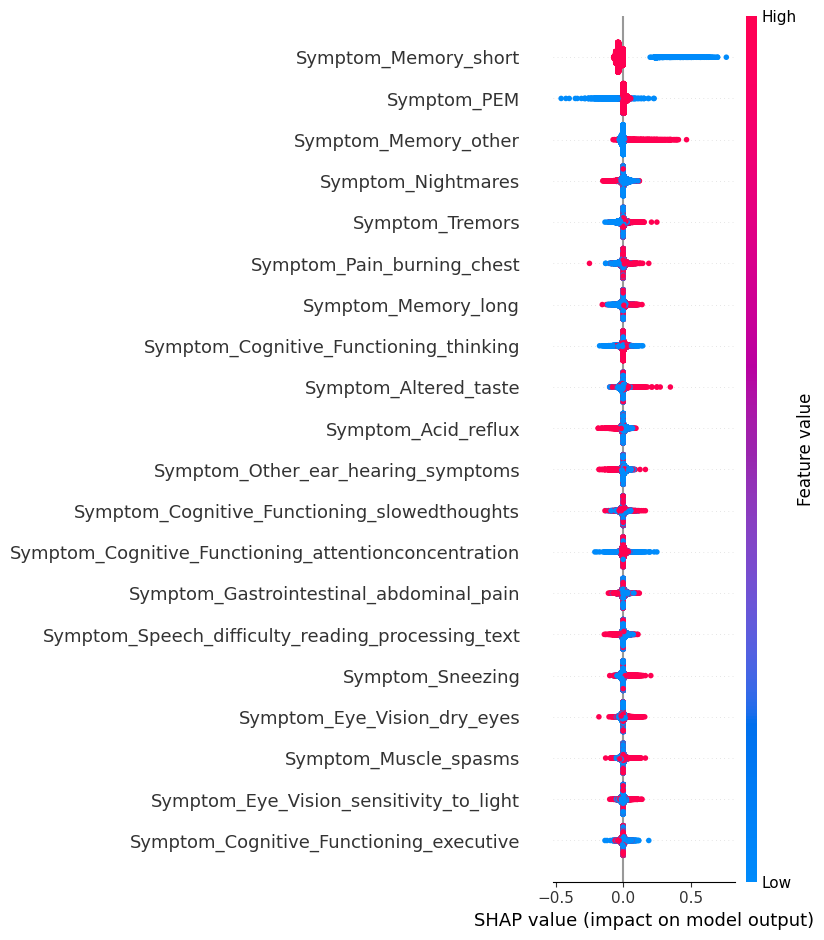

In [77]:
shap.summary_plot(shap_values, df.values, feature_names = df.columns)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


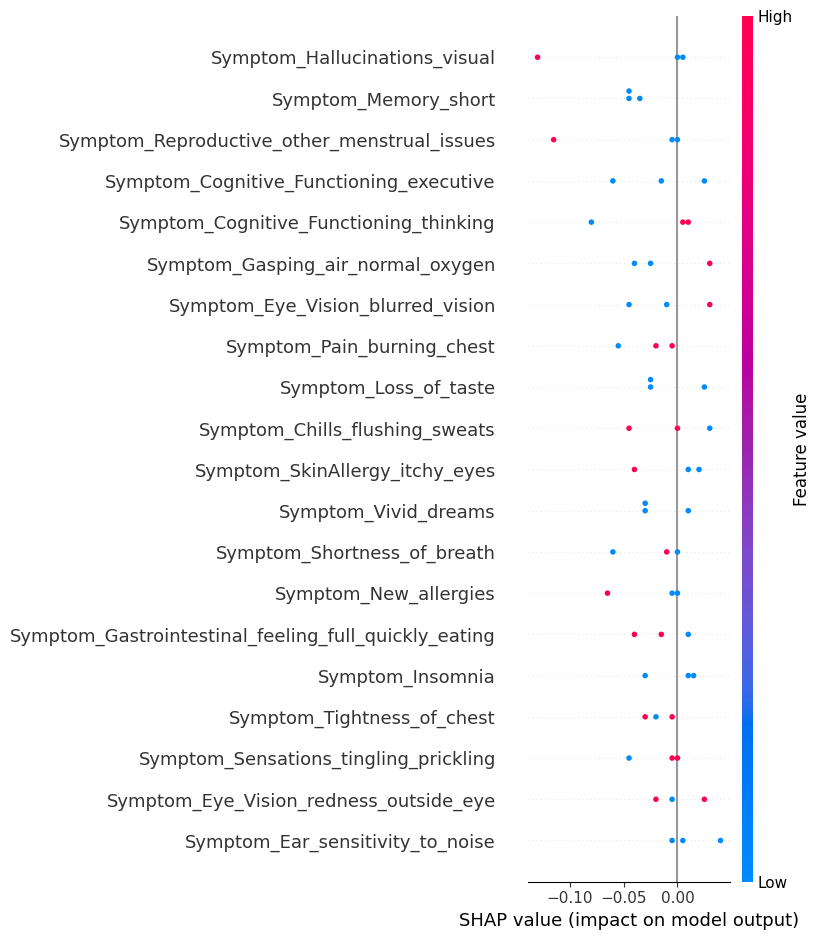

In [78]:
shap.summary_plot(shap_values[[0,2,4],:], df.loc[[3, 6, 9]].values, feature_names = df.columns)

In [58]:
shap_values.shape

(6035, 165)

In [57]:
shap.summary_plot(shap_values[1], X.values, feature_names = X.columns)

NameError: name 'X' is not defined

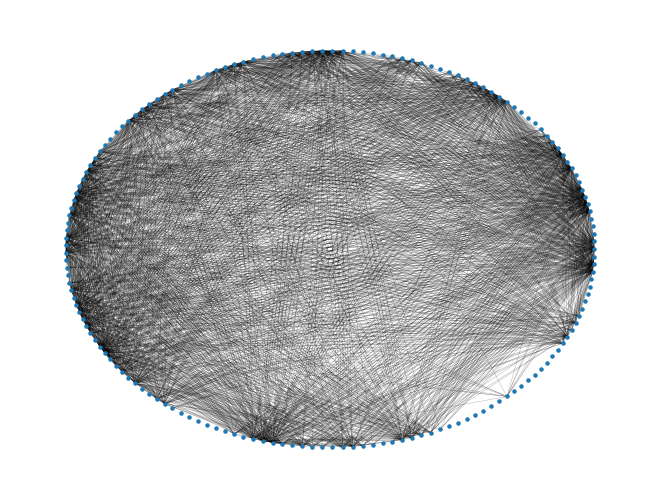

In [207]:
nx.draw_circular(G, width=0.1, node_size=5)

In [29]:
gamma = 1

In [171]:
communities = nx.community.louvain_communities(G, resolution=gamma)

In [172]:
number_of_communities = len(communities)
print(number_of_communities)

13


In [30]:
nx.community.modularity(G, communities, resolution=gamma)

0.01953405407784989

In [174]:
import random

In [175]:
random_community_ids = [random.randint(0, number_of_communities-1) for i in range(165)]

random_communities = [
    {ni for ni,n in enumerate(random_community_ids) if n == i}
    for i in range(number_of_communities)
]



In [176]:
nx.community.modularity(G, random_communities, resolution=gamma)

-0.011831165905899233